# used to prepare data for cell calling based on the output from the spacetx consortium

In [124]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# single cell data

In [125]:
singleCell = pd.read_csv('/media/christoffer/NEUTRALITY/full_coronal_section-master/data/mouse_dev/scRNAseq_new.csv.gz')

In [126]:
singleCell

,GeneName,Angioblast,Caudal_Hindbrain_Inhibitory_Neuro,Cycling_Forebrain_Radialglia,Cycling_MHB_Radialglia,Cycling_Pericyte,Early_MHB_Progenitor,Early_Microglia,Early_Progenitors_Midbrain_and_Hindbrain,Early_forebrain_radial_glia,...,Sensory_Neuroblasts.1,Sensory_Progenitor.1,Serotonergic_Neuro.1,Signaling_MHB_Progenitors.1,Spinal_Cord_Motor_Neuro.1,Thalamic_Inhibitory_Neuroblasts.1,Vascular_Leptomeningeal_Cell.1,Ventral_Telencephalic_Neuroblasts.1,Ventral_Thelencephalic_NIPCS.1,Visceral_Motor_Neuro.1
0,Eya4,0.012600,0.041795,0.262452,0.992552,0.000000,0.167755,0.005495,0.085096,0.194206,...,0.064516,0.000000,0.000000,1.015010,0.110461,0.001802,0.119565,0.006993,0.032520,0.052955
1,Nrg3,0.010309,2.453395,1.192529,3.117552,0.000000,0.103407,0.000000,0.016632,0.383944,...,0.078784,0.066667,1.000000,0.913618,0.219986,1.549394,0.146148,0.706294,4.284553,0.109866
2,Irx1,0.019473,0.086576,0.000000,0.128623,0.000000,0.257443,0.005495,0.153075,0.033216,...,0.048077,0.088889,0.666667,0.352152,0.557686,0.000000,0.004470,0.000000,0.000000,0.118075
3,Irx5,0.069874,0.180418,0.002874,0.576087,0.000000,0.470045,0.042628,0.540848,0.071687,...,0.192618,0.111111,0.000000,0.264333,0.738511,0.025317,0.128127,0.000000,0.000000,0.267875
4,Rxrg,0.004582,0.004422,0.004789,0.362319,0.000000,0.020114,0.000000,0.009245,0.023295,...,0.000000,0.000000,0.000000,0.523389,0.020745,0.041042,0.007916,0.006993,0.008130,0.209491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,Ntn1,0.016037,0.036398,0.062261,0.060789,0.069767,3.789901,0.054167,0.260953,0.262305,...,0.000000,2.933333,0.090909,0.021714,0.099308,0.045832,0.028022,0.048951,0.008130,0.282289
114,Foxj1,0.003436,0.000000,0.007663,3.982287,0.023256,0.306901,0.000000,0.009138,0.017017,...,0.000000,0.422222,0.030303,0.066216,0.026321,0.001802,0.015763,0.000000,0.154472,0.013219
115,Fzd5,0.001145,0.000000,0.000000,0.000000,0.000000,0.007419,0.004167,0.000366,0.052602,...,0.000000,0.000000,0.000000,0.002469,0.006133,0.001802,0.000000,0.000000,0.000000,0.000000
116,Folr1,0.002291,0.000000,0.020115,1.879630,0.000000,0.599902,0.004167,0.010263,0.170664,...,0.000000,0.066667,0.000000,0.837100,0.011627,0.000000,0.002173,0.000000,0.016260,0.014551


In [127]:
genes_to_have = np.unique(singleCell.GeneName)

In [128]:
len(genes_to_have)

118

# spots

In [129]:
slide_number = '10'
slide_letter = 'B'

In [130]:
spots_raw = pd.read_csv('/home/christoffer/mouse_dev/' + slide_number +'/'+ slide_letter + '/segmentation.csv')


In [131]:
spots_raw

,Column1,x,y,gene,molecule_id,confidence,cluster,cell,assignment_confidence,is_noise
0,325555,7930.0,7300.0,Apela,1,0.95,3,0,1.00,True
1,364942,10840.0,6797.0,Apela,2,0.95,3,5539,0.94,False
2,278414,10907.0,5860.0,Apela,3,0.95,1,0,0.94,True
3,138774,6952.0,3281.0,Apela,4,0.95,1,0,1.00,True
4,138888,6960.0,3211.0,Apela,5,0.95,1,0,1.00,True
...,...,...,...,...,...,...,...,...,...,...
178408,416467,5214.0,8607.0,Wnt9a,178409,0.95,1,0,1.00,True
178409,181064,3478.0,5546.0,Wnt9a,178410,0.95,4,7238,0.88,False
178410,163734,8482.0,2514.0,Wnt9a,178411,0.95,4,5984,0.50,False
178411,186405,3922.0,4625.0,Wnt9a,178412,0.95,2,0,1.00,True


In [132]:
spots_raw = spots_raw[spots_raw['gene'].isin(genes_to_have)]

In [133]:
len(np.unique(spots_raw.gene))

118

# cell 

In [134]:
cell_stats =pd.read_csv('/home/christoffer/mouse_dev/' + slide_number +'/'+ slide_letter + '/segmentation_cell_stats.csv')
cell_stats

,cell,x,y,has_center,n_transcripts,density,elongation,area
0,1,911.333333,4950.666667,False,6,0.03909,4.180,153.5
1,2,980.142857,1346.857143,False,7,0.04778,1.579,146.5
2,3,1019.200000,933.200000,False,5,0.11630,45.190,43.0
3,4,1139.571429,679.142857,False,7,0.03457,8.505,202.5
4,5,1314.111111,1982.222222,False,9,0.02264,4.013,397.5
...,...,...,...,...,...,...,...,...
8010,8011,2916.500000,5280.666667,False,6,0.10170,7.919,59.0
8011,8012,12138.500000,5786.333333,False,6,0.03409,4.443,176.0
8012,8013,8517.000000,9653.500000,False,2,NaN,NaN,NaN
8013,8014,12850.600000,7404.000000,False,5,0.10870,2.911,46.0


In [135]:
np.mean(np.array(cell_stats.n_transcripts))

10.326887086712414

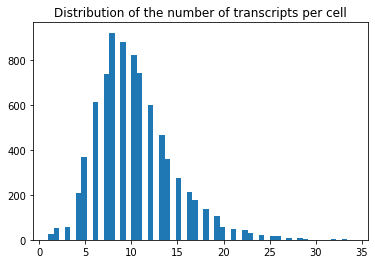

In [136]:
_ = plt.hist(np.array(cell_stats.n_transcripts), bins=55)  # arguments are passed to np.histogram
plt.title("Distribution of the number of transcripts per cell")
plt.show()

In [137]:
spots = pd.DataFrame()
spots['x_global'] = spots_raw['x']
spots['y_global'] = spots_raw['y']
spots['fov_id'] = 0
spots['label'] = spots_raw['cell']
spots['target'] = spots_raw['gene']
spots

,x_global,y_global,fov_id,label,target
0,7930.0,7300.0,0,0,Apela
1,10840.0,6797.0,0,5539,Apela
2,10907.0,5860.0,0,0,Apela
3,6952.0,3281.0,0,0,Apela
4,6960.0,3211.0,0,0,Apela
...,...,...,...,...,...
178408,5214.0,8607.0,0,0,Wnt9a
178409,3478.0,5546.0,0,7238,Wnt9a
178410,8482.0,2514.0,0,5984,Wnt9a
178411,3922.0,4625.0,0,0,Wnt9a


In [138]:
my_cells_df = cell_stats[['cell','x','y']].copy()

In [139]:
cells_for_dict = my_cells_df.cell.to_list()
x_for_dict = my_cells_df.x.to_list()
y_for_dict = my_cells_df.y.to_list()

In [140]:
mapx = dict(zip(cells_for_dict, x_for_dict))
mapy = dict(zip(cells_for_dict, y_for_dict))

In [141]:
spots["x_cell"] = spots['label'].map(mapx)

In [142]:
spots["y_cell"] = spots['label'].map(mapy)

In [143]:
group_spots = spots.groupby('label')
group_cells = cell_stats.groupby('cell')

In [144]:
cells = cell_stats[['cell','area','x','y']].copy()

In [145]:
cells['cell_id'] = cells['cell']-1
cells['fov_id'] = 0

In [146]:
cells.columns = ['label','area','x',
                     'y','cell_id','fov_id']

In [147]:
cells

,label,area,x,y,cell_id,fov_id
0,1,153.5,911.333333,4950.666667,0,0
1,2,146.5,980.142857,1346.857143,1,0
2,3,43.0,1019.200000,933.200000,2,0
3,4,202.5,1139.571429,679.142857,3,0
4,5,397.5,1314.111111,1982.222222,4,0
...,...,...,...,...,...,...
8010,8011,59.0,2916.500000,5280.666667,8010,0
8011,8012,176.0,12138.500000,5786.333333,8011,0
8012,8013,NaN,8517.000000,9653.500000,8012,0
8013,8014,46.0,12850.600000,7404.000000,8013,0


In [148]:
cells_new = cells[['cell_id','label','fov_id','area','x','y']].copy()

In [149]:
group_spots = spots.groupby('label')
group_cells = cells_new.groupby('label')

In [150]:
group_spots.get_group(1500)

,x_global,y_global,fov_id,label,target,x_cell,y_cell
12246,6467.0,3368.0,0,1500,Bnc2,6477.352941,3361.235294
57650,6478.0,3357.0,0,1500,Fzd8,6477.352941,3361.235294
79478,6471.0,3361.0,0,1500,Igfbp5,6477.352941,3361.235294
82045,6488.0,3372.0,0,1500,Irx1,6477.352941,3361.235294
115953,6479.0,3348.0,0,1500,Ostm1,6477.352941,3361.235294
131197,6459.0,3353.0,0,1500,Ptch1,6477.352941,3361.235294
131310,6490.0,3359.0,0,1500,Ptch1,6477.352941,3361.235294
131339,6474.0,3377.0,0,1500,Ptch1,6477.352941,3361.235294
131354,6479.0,3367.0,0,1500,Ptch1,6477.352941,3361.235294
131366,6486.0,3350.0,0,1500,Ptch1,6477.352941,3361.235294


In [151]:
group_cells.get_group(1500)

,cell_id,label,fov_id,area,x,y
1499,1499,1500,0,678.0,6477.352941,3361.235294


In [152]:
import numpy as np 
len(np.unique(cells_new.label))

8015

# final inspection of the data

In [153]:
spots

,x_global,y_global,fov_id,label,target,x_cell,y_cell
0,7930.0,7300.0,0,0,Apela,NaN,NaN
1,10840.0,6797.0,0,5539,Apela,10836.714286,6792.857143
2,10907.0,5860.0,0,0,Apela,NaN,NaN
3,6952.0,3281.0,0,0,Apela,NaN,NaN
4,6960.0,3211.0,0,0,Apela,NaN,NaN
...,...,...,...,...,...,...,...
178408,5214.0,8607.0,0,0,Wnt9a,NaN,NaN
178409,3478.0,5546.0,0,7238,Wnt9a,3473.272727,5556.363636
178410,8482.0,2514.0,0,5984,Wnt9a,8471.333333,2514.333333
178411,3922.0,4625.0,0,0,Wnt9a,NaN,NaN


In [154]:
cells_new

,cell_id,label,fov_id,area,x,y
0,0,1,0,153.5,911.333333,4950.666667
1,1,2,0,146.5,980.142857,1346.857143
2,2,3,0,43.0,1019.200000,933.200000
3,3,4,0,202.5,1139.571429,679.142857
4,4,5,0,397.5,1314.111111,1982.222222
...,...,...,...,...,...,...
8010,8010,8011,0,59.0,2916.500000,5280.666667
8011,8011,8012,0,176.0,12138.500000,5786.333333
8012,8012,8013,0,NaN,8517.000000,9653.500000
8013,8013,8014,0,46.0,12850.600000,7404.000000


In [155]:
cells_new[np.isnan(cells_new.area)]

,cell_id,label,fov_id,area,x,y
7509,7509,7510,0,NaN,6278.0,9265.0
7591,7591,7592,0,NaN,9911.5,6706.0
7632,7632,7633,0,NaN,9938.5,8281.5
7668,7668,7669,0,NaN,2154.0,3423.5
7700,7700,7701,0,NaN,3777.0,8386.0
...,...,...,...,...,...,...
7989,7989,7990,0,NaN,10355.5,7409.5
7990,7990,7991,0,NaN,4572.0,2684.0
7992,7992,7993,0,NaN,9944.5,7030.0
7995,7995,7996,0,NaN,5320.0,9074.0


In [156]:
cells_new.area.mean()

481.5709965982109

In [157]:
cells_new2 = cells_new.copy()
cells_new2

,cell_id,label,fov_id,area,x,y
0,0,1,0,153.5,911.333333,4950.666667
1,1,2,0,146.5,980.142857,1346.857143
2,2,3,0,43.0,1019.200000,933.200000
3,3,4,0,202.5,1139.571429,679.142857
4,4,5,0,397.5,1314.111111,1982.222222
...,...,...,...,...,...,...
8010,8010,8011,0,59.0,2916.500000,5280.666667
8011,8011,8012,0,176.0,12138.500000,5786.333333
8012,8012,8013,0,NaN,8517.000000,9653.500000
8013,8013,8014,0,46.0,12850.600000,7404.000000


In [158]:
np.isnan(cells_new2.area)

0       False
1       False
2       False
3       False
4       False
        ...  
8010    False
8011    False
8012     True
8013    False
8014    False
Name: area, Length: 8015, dtype: bool

In [159]:
cells_new2.area.mean()

481.5709965982109

In [160]:
area_column = np.array(cells_new2.area)

In [161]:
s=np.isnan(area_column)
area_column[s]= cells_new2.area.mean()

In [162]:
area_list = area_column.tolist()

In [163]:
cells_new2 = cells_new2.drop(columns = 'area')

In [164]:
cells_new2.insert(3, 'area', area_list)

In [165]:
cells_new2

,cell_id,label,fov_id,area,x,y
0,0,1,0,153.500000,911.333333,4950.666667
1,1,2,0,146.500000,980.142857,1346.857143
2,2,3,0,43.000000,1019.200000,933.200000
3,3,4,0,202.500000,1139.571429,679.142857
4,4,5,0,397.500000,1314.111111,1982.222222
...,...,...,...,...,...,...
8010,8010,8011,0,59.000000,2916.500000,5280.666667
8011,8011,8012,0,176.000000,12138.500000,5786.333333
8012,8012,8013,0,481.570997,8517.000000,9653.500000
8013,8013,8014,0,46.000000,12850.600000,7404.000000


In [166]:
cells_new2[np.isnan(cells_new2.area)]

,cell_id,label,fov_id,area,x,y


## write csv 

In [167]:
spots.to_csv('/home/christoffer/mouse_dev/' + slide_number +'/'+ slide_letter + '/spots_new.csv', index = False)

In [168]:
spots

,x_global,y_global,fov_id,label,target,x_cell,y_cell
0,7930.0,7300.0,0,0,Apela,NaN,NaN
1,10840.0,6797.0,0,5539,Apela,10836.714286,6792.857143
2,10907.0,5860.0,0,0,Apela,NaN,NaN
3,6952.0,3281.0,0,0,Apela,NaN,NaN
4,6960.0,3211.0,0,0,Apela,NaN,NaN
...,...,...,...,...,...,...,...
178408,5214.0,8607.0,0,0,Wnt9a,NaN,NaN
178409,3478.0,5546.0,0,7238,Wnt9a,3473.272727,5556.363636
178410,8482.0,2514.0,0,5984,Wnt9a,8471.333333,2514.333333
178411,3922.0,4625.0,0,0,Wnt9a,NaN,NaN


In [169]:
cells_new2.to_csv('/home/christoffer/mouse_dev/' + slide_number +'/'+ slide_letter + '/cells_new.csv', index = False)